In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dataset(Random Data)

In [2]:
#Long-distance and nonlinear dataset
T = 10 #we can vary it and see the output differences
D = 1
X = []
Y = []

#het_label checks sign of three consecutive random numbers
def get_label(x, i1, i2, i3):
    #x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
      return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
      return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
      return 1  
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
      return 1
    return 0

for t in range(5000):
   x = np.random.randn(T) #Random data = No temporal corelation between nearby data
   X.append(x)

   y = get_label(x, -1, -2, -3) #short distance (last three values)
   #y = get_label(x, 0, 1, 2) #Long distance (first three values)
   Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [3]:
X,Y

(array([[-0.85924234,  1.30113896, -0.92602869, ..., -0.45239815,
         -0.9155851 , -0.50540935],
        [ 0.95527055,  1.4652579 ,  0.48436634, ...,  1.12698468,
         -0.99541866,  1.1649393 ],
        [-0.03403768,  0.91677851, -1.53366612, ..., -0.15622418,
          0.07571931, -0.12031291],
        ...,
        [ 0.33321612, -0.19113994,  0.81011957, ..., -0.21691979,
         -0.15981347, -1.12163825],
        [ 0.72405854,  0.60122109, -3.03096411, ..., -0.31291605,
          0.6692904 ,  0.45371106],
        [ 0.618169  , -0.06123417,  0.00680321, ...,  0.19910825,
         -0.49119422, -0.96134468]]), array([1, 1, 0, ..., 1, 1, 0]))

In [4]:
X.shape,Y.shape

((5000, 10), (5000,))

#A.Small Distance Problem



##a.Sequence Length = 10

###1.Linear Model (100 epochs)

In [6]:
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics = ['accuracy'])
r = model.fit(X, Y, validation_split=0.5, epochs=100)

Epoch 1/100
79/79 [==============================] - 2s 4ms/step - loss: 0.7806 - accuracy: 0.5012 - val_loss: 0.7119 - val_accuracy: 0.4900
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5040 - val_loss: 0.6954 - val_accuracy: 0.5032
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5124 - val_loss: 0.6940 - val_accuracy: 0.4956
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5008 - val_loss: 0.6943 - val_accuracy: 0.4980
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.5016 - val_loss: 0.6949 - val_accuracy: 0.4976
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6954 - accuracy: 0.4968 - val_loss: 0.6944 - val_accuracy: 0.4744
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4836 - val_loss: 0.6947 - val_accuracy: 0.4840
Epoch 8/100
7

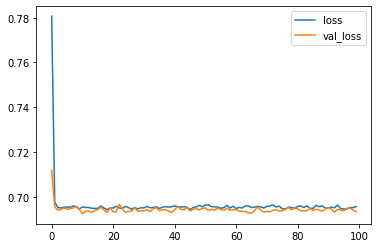

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

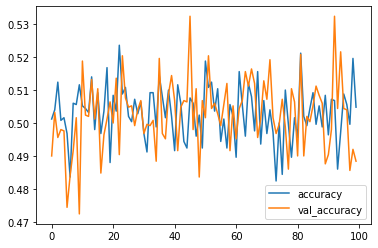

In [8]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Conclusion: It fails. We get only 50% accuracy.

###2.SimpleRNN (200 epochs)

In [13]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 200)

Epoch 1/200
79/79 [==============================] - 2s 7ms/step - loss: 0.6900 - accuracy: 0.5716 - val_loss: 0.6556 - val_accuracy: 0.6384
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6162 - accuracy: 0.7320 - val_loss: 0.5815 - val_accuracy: 0.7824
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.7872 - val_loss: 0.5079 - val_accuracy: 0.8032
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4755 - accuracy: 0.8216 - val_loss: 0.4410 - val_accuracy: 0.8336
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.8520 - val_loss: 0.3673 - val_accuracy: 0.8780
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.8760 - val_loss: 0.3140 - val_accuracy: 0.8960
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.2851 - accuracy: 0.9044 - val_loss: 0.2812 - val_accuracy: 0.8972
Epoch 8/200
7

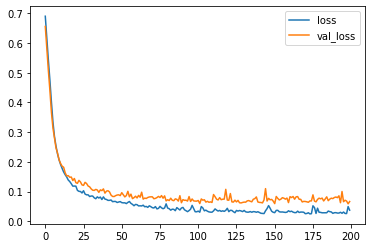

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

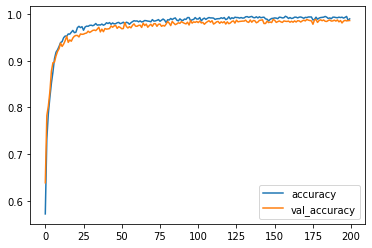

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Conclusion: Simple RNN helped to increase accuracy to 99%

#B.Long distance Problem

##a.Sequence length 10

###1.SimpleRNN(200 epoch)

In [17]:
#Long-distance and nonlinear dataset
T = 10 #we can vary it and see the output differences
D = 1
X = []
Y = []

for t in range(5000):
   x = np.random.randn(T) #Random data = No temporal corelation between nearby data
   X.append(x)
   y = get_label(x, 0, 1, 2) #Long distance (first three values)
   Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [18]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 200)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6952 - accuracy: 0.5164 - val_loss: 0.6961 - val_accuracy: 0.5004
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5328 - val_loss: 0.6996 - val_accuracy: 0.4860
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5232 - val_loss: 0.6968 - val_accuracy: 0.4932
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5340 - val_loss: 0.6980 - val_accuracy: 0.5268
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5476 - val_loss: 0.6860 - val_accuracy: 0.5528
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.5656 - val_loss: 0.6694 - val_accuracy: 0.5948
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.5632 - val_loss: 0.6696 - val_accuracy: 0.5952
Epoch 8/200


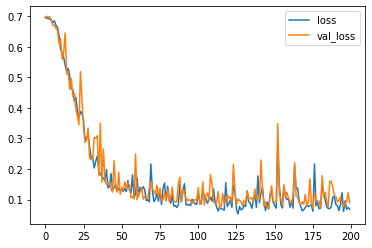

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

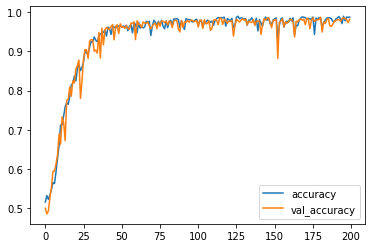

In [20]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Conclusion: Output is affected due to vanishing gradient problem.
We are not able to receive accuracy like before.

###2.LSTM(200 epoch)

In [21]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 200)

Epoch 1/200
79/79 [==============================] - 4s 15ms/step - loss: 0.6927 - accuracy: 0.5108 - val_loss: 0.6967 - val_accuracy: 0.4948
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6920 - accuracy: 0.5164 - val_loss: 0.6960 - val_accuracy: 0.4856
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6914 - accuracy: 0.5152 - val_loss: 0.6967 - val_accuracy: 0.5024
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6901 - accuracy: 0.5204 - val_loss: 0.6951 - val_accuracy: 0.5040
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6864 - accuracy: 0.5504 - val_loss: 0.6915 - val_accuracy: 0.5324
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6727 - accuracy: 0.5888 - val_loss: 0.6830 - val_accuracy: 0.5700
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6535 - accuracy: 0.6180 - val_loss: 0.6569 - val_accuracy: 0.5996
Epoch 8

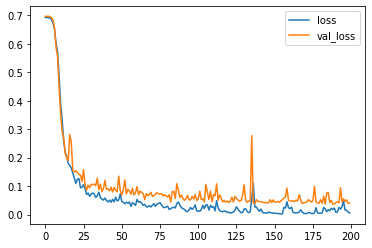

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

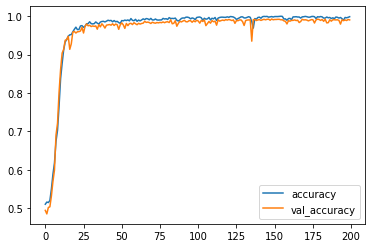

In [23]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Conclusion: Loss and accuracy is better now.

##b.Sequence length 20

###1.SimpleRNN (200 epoch)

In [24]:
#Long-distance and nonlinear dataset
T = 20 #we can vary it and see the output differences
D = 1
X = []
Y = []

for t in range(5000):
   x = np.random.randn(T) #Random data = No temporal corelation between nearby data
   X.append(x)
   y = get_label(x, 0, 1, 2) #Long distance (first three values)
   Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [25]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 200)

Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.6978 - accuracy: 0.5056 - val_loss: 0.6964 - val_accuracy: 0.5016
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5132 - val_loss: 0.6960 - val_accuracy: 0.4968
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5224 - val_loss: 0.6953 - val_accuracy: 0.5020
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6922 - accuracy: 0.5124 - val_loss: 0.6960 - val_accuracy: 0.4960
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5164 - val_loss: 0.6956 - val_accuracy: 0.5060
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5124 - val_loss: 0.6948 - val_accuracy: 0.4980
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5176 - val_loss: 0.6959 - val_accuracy: 0.5036
Epoch 8/200


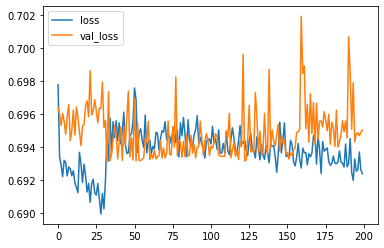

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

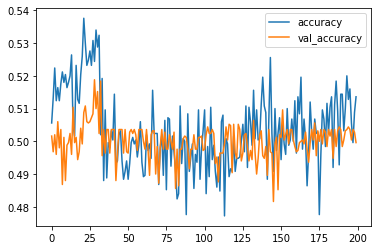

In [27]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Conclusion: When sequence length is increased everything is again dead.

###2.LSTM(200 epoch)

In [28]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 200)

Epoch 1/200
79/79 [==============================] - 4s 19ms/step - loss: 0.6949 - accuracy: 0.5044 - val_loss: 0.6935 - val_accuracy: 0.4928
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.5108 - val_loss: 0.6936 - val_accuracy: 0.4920
Epoch 3/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.5096 - val_loss: 0.6933 - val_accuracy: 0.4928
Epoch 4/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.5032 - val_loss: 0.6934 - val_accuracy: 0.4956
Epoch 5/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6937 - accuracy: 0.4956 - val_loss: 0.6938 - val_accuracy: 0.4996
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6934 - accuracy: 0.5132 - val_loss: 0.6932 - val_accuracy: 0.4984
Epoch 7/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6928 - accuracy: 0.5128 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 

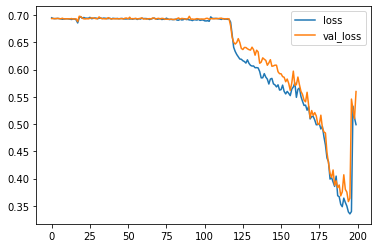

In [29]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

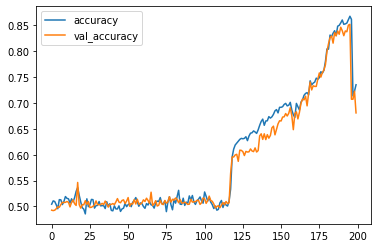

In [30]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

###3.GRU(400 epoch)

In [31]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 400)

Epoch 1/400
79/79 [==============================] - 4s 23ms/step - loss: 0.6943 - accuracy: 0.4928 - val_loss: 0.6944 - val_accuracy: 0.4868
Epoch 2/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6945 - accuracy: 0.5044 - val_loss: 0.6948 - val_accuracy: 0.4892
Epoch 3/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.4932
Epoch 4/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6938 - accuracy: 0.4884 - val_loss: 0.6935 - val_accuracy: 0.4908
Epoch 5/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.5056 - val_loss: 0.6938 - val_accuracy: 0.4868
Epoch 6/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6933 - val_accuracy: 0.5060
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5104
Epoch 

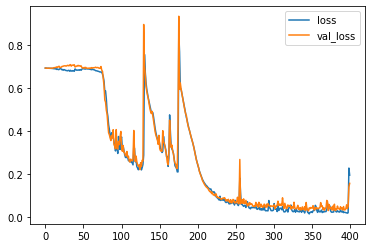

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

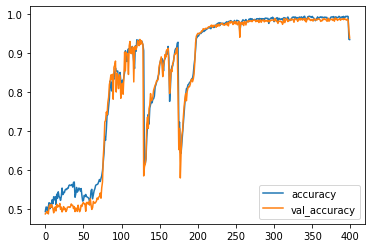

In [33]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


##c. Sequence length 30

###1.LSTM (400 epoch)

In [34]:
#Long-distance and nonlinear dataset
T = 30 #we can vary it and see the output differences
D = 1
X = []
Y = []

for t in range(5000):
   x = np.random.randn(T) #Random data = No temporal corelation between nearby data
   X.append(x)
   y = get_label(x, 0, 1, 2) #Long distance (first three values)
   Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [35]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 400)

Epoch 1/400
79/79 [==============================] - 4s 26ms/step - loss: 0.6935 - accuracy: 0.4988 - val_loss: 0.6937 - val_accuracy: 0.5096
Epoch 2/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6940 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.4912
Epoch 3/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.5100
Epoch 4/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.4892 - val_loss: 0.6935 - val_accuracy: 0.5076
Epoch 5/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 6/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6934 - accuracy: 0.4928 - val_loss: 0.6936 - val_accuracy: 0.5084
Epoch 7/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.5068 - val_loss: 0.6934 - val_accuracy: 0.5004
Epoch 

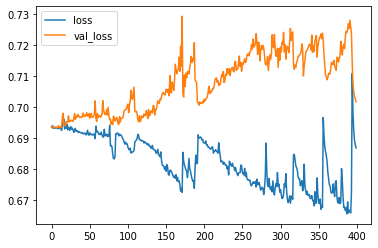

In [36]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

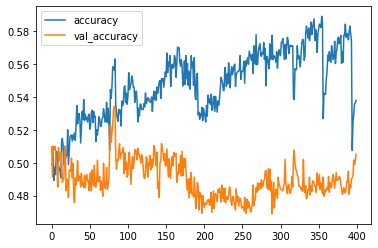

In [37]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


Conclusion: It appears we hit the limit of LSTM

###2.LSTM w/ GlobalMaxPool1D (400 epoch)

In [38]:
#Long-distance and nonlinear dataset
T = 30 #we can vary it and see the output differences
D = 1
X = []
Y = []

for t in range(5000):
   x = np.random.randn(T) #Random data = No temporal corelation between nearby data
   X.append(x)
   y = get_label(x, 0, 1, 2) #Long distance (first three values)
   Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [39]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = LSTM(5, return_sequences=True)(i) #TxM
x = GlobalMaxPool1D()(x) #makes vector M
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])
r = model.fit(inputs,Y, validation_split=0.5, epochs = 400)

Epoch 1/400
79/79 [==============================] - 5s 24ms/step - loss: 0.6950 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.5032
Epoch 2/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6924 - val_accuracy: 0.5164
Epoch 3/400
79/79 [==============================] - 1s 19ms/step - loss: 0.6940 - accuracy: 0.5004 - val_loss: 0.6923 - val_accuracy: 0.5280
Epoch 4/400
79/79 [==============================] - 2s 19ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5176
Epoch 5/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6930 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 6/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6919 - accuracy: 0.5188 - val_loss: 0.6953 - val_accuracy: 0.5020
Epoch 7/400
79/79 [==============================] - 1s 18ms/step - loss: 0.6938 - accuracy: 0.4948 - val_loss: 0.6924 - val_accuracy: 0.4944
Epoch 

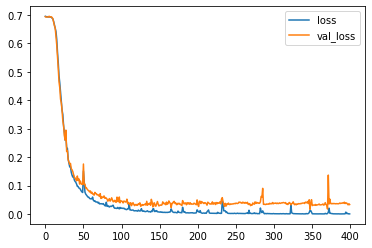

In [40]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

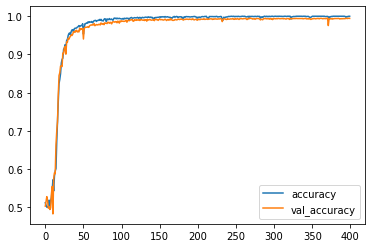

In [41]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


Conclusion: Globalmaxpooling + LSTM is great!